In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
import os
import subprocess

##  Read an input image

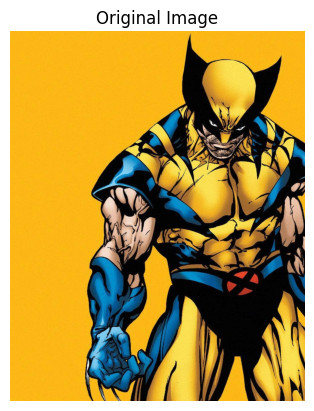

In [2]:
# Read the input image
input_image_path = 'data/wolverine.jpg'
image = cv2.imread(input_image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


## Convert to Grayscale

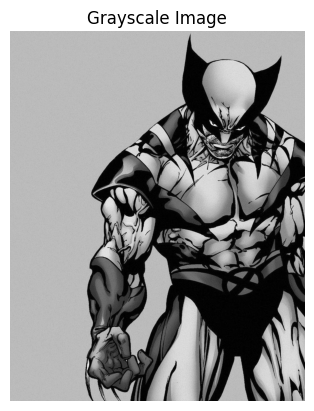

In [3]:
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


# 1. Simple ASCII Art Generator 

## Scale the image & Draw grid lines

Original image dimensions (HxW): 1080x860
Scaled ratio: 0.09302325581395349
Scaled image dimensions (HxW): 101x80
Tile size (HxW): 10x10
Number of tiles (HxW): 108x86


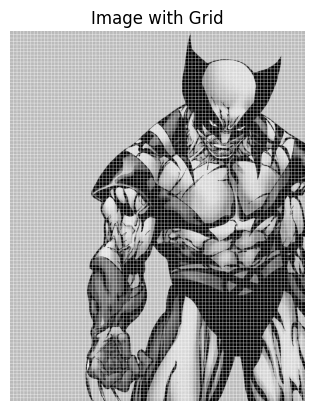

In [6]:
# Show the original dimensions
original_height, original_width = grayscale_image.shape
print(f"Original image dimensions (HxW): {original_height}x{original_width}")

# Define the target width (columns)
target_columns = 80

# Calculate the scaling factor for the columns
scale_factor = target_columns / original_width
print(f"Scaled ratio: {scale_factor}")

# Calculate the new height based on the aspect ratio
scaled_width = target_columns
scaled_height = math.ceil(original_height * scale_factor)
print(f"Scaled image dimensions (HxW): {scaled_height}x{scaled_width}")

# Calculate the tile size
tile_width = original_width // scaled_width
tile_height = original_height // scaled_height

print(f"Tile size (HxW): {tile_height}x{tile_width}")

# Calculate the number of tiles
num_tiles_height = original_height // tile_height
num_tiles_width = original_width // tile_width

print(f"Number of tiles (HxW): {num_tiles_height}x{num_tiles_width}")

# Copy the grayscale image to draw the grid on it
grid_image = grayscale_image.copy()

# Draw grid lines
for i in range(1, num_tiles_height):
    cv2.line(grid_image, (0, i * tile_height), (original_width, i * tile_height), (255, 0, 0), 1)
for j in range(1, num_tiles_width):
    cv2.line(grid_image, (j * tile_width, 0), (j * tile_width, original_height), (255, 0, 0), 1)

# Show the image with the grid
plt.imshow(grid_image, cmap='gray')
plt.title('Image with Grid')
plt.axis('off')
plt.show()

## Map each pixel block to an ASCII character level 10

In [8]:
def ascii_art_gen(image, ascii_chars, target_columns=80):
    original_height, original_width = image.shape
    
    # Calculate the scaling factor
    scale_factor = target_columns / original_width
    scaled_width = target_columns
    scaled_height = math.ceil(original_height * scale_factor)

    # Tile size
    tile_width = original_width / scaled_width
    tile_height = original_height / scaled_height

    ascii_grid = []
    for row in range(scaled_height):
        ascii_row = []
        for col in range(scaled_width):
            start_x = int(col * tile_width)
            end_x = int((col + 1) * tile_width)
            start_y = int(row * tile_height)
            end_y = int((row + 1) * tile_height)
            pixel_block = image[start_y:end_y, start_x:end_x]
            avg_pixel_value = np.mean(pixel_block)
            x = 256 / len(ascii_chars)
            ascii_char = ascii_chars[int(avg_pixel_value // x)]
            ascii_row.append(ascii_char)
        ascii_grid.append(ascii_row)
    
    return ascii_grid


In [13]:
ascii_chars_10 = "@%#*+=-:. "

filename = os.path.splitext(os.path.basename(input_image_path))[0] # Extract file name without extension

# Save the ASCII art to a text file
ascii_grid_l10 = ascii_art_gen(grayscale_image, ascii_chars_10)
text_filename = f"{filename}_10_level.txt"
with open(text_filename, "w") as file:
    for row in ascii_grid_l10:
        file.write("".join(row) + "\n")

print(f"ASCII art for the 10 levels of gray saved as {text_filename}")


# Save as a grayscale image
# Define font and size for text rendering
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7 # Adjust the size as necessary
thickness = 1
color = (0, 0, 0)  # Black text

# Create a blank white image
new_image_width = 20 * 80  # 20 pixels per character
new_image_height = 20 * 100
new_image = np.ones((new_image_height, new_image_width, 3), dtype=np.uint8) * 255  # White background

# Loop over the ASCII grid and place each character on the image
for row in range(scaled_height):
    for col in range(scaled_width):
        ascii_char = ascii_grid_l10[row][col]
        # Position where the character will be drawn
        position = (col * 20, row * 20)  # Adjust positions for better alignment
        cv2.putText(new_image, ascii_char, position, font, font_scale, color, thickness)

# Save the resulting image
image_filename = f"{filename}_10_level.png"
cv2.imwrite(image_filename, new_image)

print(f"Image with ASCII characters saved as {image_filename}")


ASCII art for the 10 levels of gray saved as wolverine_10_level.txt
Image with ASCII characters saved as wolverine_10_level.png


## Map each pixel block to an ASCII character level 70

In [14]:
ascii_chars_70 = '$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^‘’. '

# Save the ASCII art to a text file
ascii_grid_l70 = ascii_art_gen(grayscale_image, ascii_chars_70)
text_filename = f"{filename}_70_level.txt"
with open(text_filename, "w") as file:
    for row in ascii_grid_l70:
        file.write("".join(row) + "\n")

print(f"ASCII art for the 70 levels of gray saved as {text_filename}")


# Save as a grayscale image
# Define font and size for text rendering
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7 # Adjust the size as necessary
thickness = 1
color = (0, 0, 0)  # Black text

# Create a blank white image
new_image_width = 20 * 80  # 20 pixels per character
new_image_height = 20 * 100
new_image = np.ones((new_image_height, new_image_width, 3), dtype=np.uint8) * 255  # White background

# Loop over the ASCII grid and place each character on the image
for row in range(scaled_height):
    for col in range(scaled_width):
        ascii_char = ascii_grid_l70[row][col]
        # Position where the character will be drawn
        position = (col * 20 - 20, row * 20)  # Adjust positions for better alignment
        cv2.putText(new_image, ascii_char, position, font, font_scale, color, thickness)

# Save the resulting image
image_filename = f"{filename}_70_level.png"
cv2.imwrite(image_filename, new_image)

print(f"Image with ASCII characters saved as {image_filename}")


ASCII art for the 70 levels of gray saved as wolverine_70_level.txt
Image with ASCII characters saved as wolverine_70_level.png


<>:1: SyntaxWarning: invalid escape sequence '\|'
<>:1: SyntaxWarning: invalid escape sequence '\|'
C:\Users\Amit Bera\AppData\Local\Temp\ipykernel_24836\3393992249.py:1: SyntaxWarning: invalid escape sequence '\|'
  ascii_chars_70 = '$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^‘’. '


# 2. Data Science based ASCII Art Generator

## Create a pca csv file for 2 fonts

In [67]:

def generate_character_image(font, char, size=(10, 10)):
    image = np.ones((size[1], size[0]), dtype=np.uint8) * 255
    font_scale = 0.35
    thickness = 1
    text_size = cv2.getTextSize(char, font, font_scale, thickness)[0]
    text_x = (size[0] - text_size[0]) // 2
    text_y = (size[1] + text_size[1]) // 2 - 1
    cv2.putText(image, char, (text_x, text_y), font, font_scale, 0, thickness)
    return image

def apply_pca_on_image(image, k):
    image = image.astype(float)
    pca = PCA(n_components=k)
    transformed = pca.fit_transform(image)  # Shape: (10, k)
    return transformed.flatten()  # Convert to 1D

# Define characters and PCA components
char_string1 = "".join(chr(i) for i in range(32,127))[::-1]
char_string2 = "".join(chr(i) for i in range(161,256))[::-1]
pca_char_string = char_string2 + char_string1

k_values = [3, 5, 7]

# font
font1 = cv2.FONT_HERSHEY_SIMPLEX
font2 = cv2.FONT_ITALIC
def create_csv(font):
    # Store PCA results
    data = []
    for char in pca_char_string:
        char_image = generate_character_image(font, char)
        pca_results = {}
        pca_results["Character"] = char
        for k in k_values:
            vector = apply_pca_on_image(char_image, k)
            pca_results[f"k={k}"] = " ".join(map(str, vector))  # Convert array to space-separated string
        data.append(pca_results)

    # Convert to DataFrame and save
    df = pd.DataFrame(data, columns=["Character"] + [f"k={k}" for k in k_values])
    csv_name = f"pca_characters_{font}.csv"
    df.to_csv(csv_name, index=False)
    print(f"PCA results saved to 'pca_characters_{font}.csv'.")
    return csv_name

create_csv(font1)
create_csv(font2)


c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: divide by zero encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: divide by zero encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposi

PCA results saved to 'pca_characters_0.csv'.
PCA results saved to 'pca_characters_16.csv'.


c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: divide by zero encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: divide by zero encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\Amit Bera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposi

'pca_characters_16.csv'

In [68]:
df1 = pd.read_csv('pca_characters_0.csv')
df1

,Character,k=3,k=5,k=7
0,ÿ,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...
1,þ,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...
2,ý,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...
3,ü,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...
4,û,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...,-247.7599941130691 18.04885021203008 53.267762...
...,...,...,...,...
185,$,30.841974908627048 -13.191833164389427 187.979...,30.841974908627048 -13.191833164389427 187.979...,30.841974908627048 -13.191833164389427 187.979...
186,#,-146.06749736852558 311.4639404690305 2.604452...,-146.06749736852558 311.4639404690305 2.604452...,-146.06749736852558 311.4639404690305 2.604452...
187,"""",-108.18733752154178 2.191884363214746e-14 5.86...,-108.18733752154178 2.191884363214746e-14 5.86...,-108.18733752154178 2.191884363214746e-14 5.86...
188,!,203.7109606944967 27.714517728533846 2.6298499...,203.7109606944967 27.714517728533846 2.6298499...,203.7109606944967 27.714517728533846 2.6298499...


## Get PCA based ASCII art image

In [ ]:
# L1 Norm Function
def l1_norm(vec1, vec2):
    return np.sum(np.abs(np.array(vec1) - np.array(vec2)))

# PCA ASCII Art Generator
def pca_ascii_art_gen(image, csv_name, k, target_columns=80):
    df = pd.read_csv(csv_name, converters={
    "k=3": lambda x: list(map(float, x.split())),
    "k=5": lambda x: list(map(float, x.split())),
    "k=7": lambda x: list(map(float, x.split()))
    })

    # Ensure the image is grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get image dimensions
    original_height, original_width = image.shape
    
    # Calculate scaling factor and resized dimensions
    scale_factor = target_columns / original_width
    scaled_width = target_columns
    scaled_height = math.ceil(original_height * scale_factor)

    # Compute tile sizes
    tile_width = max(1, original_width // scaled_width)
    tile_height = max(1, original_height // scaled_height)

    pca_grid = []
    for row in range(scaled_height):
        pca_row = []
        for col in range(scaled_width):
            # Extract the pixel block
            pixel_block = image[row*tile_height:(row+1)*tile_height, col*tile_width:(col+1)*tile_width]
            pixel_pca = apply_pca_on_image(pixel_block, k)

            # Find the best character match
            min_norm = float("inf")
            best_match = None
            for _, val in df.iterrows():
                stored_vector = val[f"k={k}"]
                norm = l1_norm(pixel_pca, stored_vector)
                if norm < min_norm:
                    min_norm = norm
                    best_match = val["Character"]

            pca_row.append(best_match)
        pca_grid.append(pca_row)

    return pca_grid

for k in [3, 5, 7]:
    pca_grid = pca_ascii_art_gen(grayscale_image, 'pca_characters_0.csv', k)
    filename = input_image_path.split('.')[0]  # Extract file name without extension

    # Save the ASCII art to a text file
    text_filename = f"{filename}_pca_k{k}.txt"
    with open(text_filename, "w") as file:
        for row in pca_grid:
            file.write("".join(row) + "\n")

    print(f"ASCII art for the pca of gray saved as {text_filename}")


    # Save as a grayscale image
    # Define font and size for text rendering
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7 
    thickness = 1
    color = (0, 0, 0)  # Black text

    # Create a blank white image
    new_image_width = 20 * 80  # 20 pixels per character
    new_image_height = 20 * 100
    new_image = np.ones((new_image_height, new_image_width, 3), dtype=np.uint8) * 255  # White background

    # Loop over the ASCII grid and place each character on the image
    for row in range(scaled_height):
        for col in range(scaled_width):
            ascii_char = pca_grid[row][col]
            # Position where the character will be drawn
            position = (col * 20, row * 20)  # Adjust positions for better alignment
            cv2.putText(new_image, ascii_char, position, font, font_scale, color, thickness)

    # Save the resulting image
    image_filename = f"{filename}_pca_k{k}.png"
    cv2.imwrite(image_filename, new_image)

    print(f"Image with ASCII characters saved as {image_filename}")


ASCII art for the pca of gray saved as wolverine_pca_k3.txt
Image with ASCII characters saved as wolverine_pca_k3.png
ASCII art for the pca of gray saved as wolverine_pca_k5.txt
Image with ASCII characters saved as wolverine_pca_k5.png
ASCII art for the pca of gray saved as wolverine_pca_k7.txt
Image with ASCII characters saved as wolverine_pca_k7.png


# 3. Movie ASCII Art Generator

In [22]:
# Function to convert ASCII grid to image
def ascii_to_image(ascii_grid, img_size=(1600, 900)):
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5 # Adjust the size as necessary
    thickness = 1
    color = (0, 0, 0)  # Black text

    # Create blank white image
    new_image = np.ones((img_size[1], img_size[0], 3), dtype=np.uint8) * 255

    # Place characters on image
    char_width = img_size[0] // len(ascii_grid[0])
    char_height = img_size[1] // len(ascii_grid)

    for row in range(len(ascii_grid)):
        for col in range(len(ascii_grid[row])):
            char = ascii_grid[row][col]
            position = (col * char_width, row * char_height + int(char_height * 0.8))
            cv2.putText(new_image, char, position, font, font_scale, color, thickness)

    return new_image

# Function to process video
def process_video(video_path, output_video, frame_rate=30):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    output_dir = "ascii_frames"
    os.makedirs(output_dir, exist_ok=True)

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Generate ASCII art
        ascii_grid = ascii_art_gen(gray_frame, ascii_chars_70)
        ascii_image = ascii_to_image(ascii_grid, (frame_width, frame_height))

        # Save frame
        frame_filename = os.path.join(output_dir, f"frame_{frame_count:04d}.png")
        cv2.imwrite(frame_filename, ascii_image)
        frame_count += 1
    
    cap.release()

    # Convert frames to video
    output_video_path = output_video
    frame_pattern = os.path.join(output_dir, "frame_%04d.png")
    subprocess.run([
        "ffmpeg", "-y", "-framerate", str(frame_rate), "-i", frame_pattern,
        "-c:v", "libx264", "-pix_fmt", "yuv420p", output_video_path
    ])

    return output_video_path

# Extract audio from original video
def extract_audio(video_path, output_audio):
    subprocess.run([
        "ffmpeg", "-y", "-i", video_path, "-q:a", "0", "-map", "a", output_audio
    ])

# Merge ASCII video with original audio
def merge_audio_video(ascii_video, original_audio, final_output):
    subprocess.run([
        "ffmpeg", "-y", "-i", ascii_video, "-i", original_audio,
        "-c:v", "copy", "-c:a", "aac", "-strict", "experimental", final_output
    ])

# Input video path
video_path = "sample_vid2.mp4"

# Process video and get ASCII video output
ascii_video = "ascii_video.mp4"
ascii_video_path = process_video(video_path, ascii_video)

# Extract audio
audio_file = "audio.aac"
extract_audio(video_path, audio_file)

# Merge ASCII video with extracted audio
final_video = "sample_vid2_ascii_level70.mp4"
merge_audio_video(ascii_video_path, audio_file, final_video)

print(f"Final ASCII video saved as: {final_video}")

Final ASCII video saved as: sample_vid2_ascii_level70.mp4
